In [1]:
import pandas as pd

# Load your dataset
file_path = r'C:\Users\akp24\docassist-main\data\raw\dataset.xlsx'
df = pd.read_excel(file_path)

# Define the age groups 
age_bins = [0, 12, 35, 55, 75, 100]
age_labels = ['Infants and Young Children', 'Adolescents and Young Adults', 'Middle-aged Adults', 'Older Adults', 'Elderly']

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels, right=False)

# Save the dataset with the new AGE_GROUP feature
processed_file_path = r'C:\Users\akp24\docassist-main\data\processed\dataset_with_age_groups.xlsx'
df.to_excel(processed_file_path, index=False)

# Display the first few rows to verify
print(df[['AGE', 'AGE_GROUP']].head())


   AGE                     AGE_GROUP
0   33  Adolescents and Young Adults
1   36            Middle-aged Adults
2   70                  Older Adults
3   18  Adolescents and Young Adults
4   36            Middle-aged Adults


In [3]:
import pandas as pd

file_path = r'C:\Users\akp24\docassist-main\data\processed\dataset_with_age_groups.xlsx'
df = pd.read_excel(file_path)

# Define percentile thresholds for each parameter, age group, and sex
percentile_thresholds = {
    'Male': {
        'Infants and Young Children': {
            'HAEMATOCRIT': (31.7, 43.2),
            'HAEMOGLOBINS': (10.18, 14.72),
            'ERYTHROCYTE': (4.168, 5.624),
            'LEUCOCYTE': (2.9, 17.02),
            'THROMBOCYTE': (86.8, 458.4),
            'MCH': (22.14, 27.9),
            'MCHC': (31.8, 35.46),
            'MCV': (67.42, 82.36)
        },
        'Adolescents and Young Adults': {
            'HAEMATOCRIT': (30.92, 49.49),
            'HAEMOGLOBINS': (10.11, 16.7),
            'ERYTHROCYTE': (4.148, 6.17),
            'LEUCOCYTE': (2.5, 14.3),
            'THROMBOCYTE': (50.0, 382.9),
            'MCH': (23.11, 30.4),
            'MCHC': (31.4, 35.2),
            'MCV': (70.41, 89.8)
        },
        'Middle-aged Adults': {
            'HAEMATOCRIT': (29.8, 48.675),
            'HAEMOGLOBINS': (9.6, 16.4),
            'ERYTHROCYTE': (3.5275, 6.015),
            'LEUCOCYTE': (3.925, 18.55),
            'THROMBOCYTE': (79.0, 479.75),
            'MCH': (22.5, 31.3),
            'MCHC': (31.4, 35.2),
            'MCV': (70.925, 92.175)
        },
        'Older Adults': {
            'HAEMATOCRIT': (26.79, 46.1),
            'HAEMOGLOBINS': (8.9, 15.7),
            'ERYTHROCYTE': (3.148, 5.491),
            'LEUCOCYTE': (4.59, 20.0),
            'THROMBOCYTE': (112.9, 443.9),
            'MCH': (24.78, 32.1),
            'MCHC': (31.79, 35.5),
            'MCV': (75.96, 95.51)
        },
        'Elderly': {
            'HAEMATOCRIT': (24.225, 44.5),
            'HAEMOGLOBINS': (8.55, 15.125),
            'ERYTHROCYTE': (2.725, 4.98),
            'LEUCOCYTE': (3.9, 18.625),
            'THROMBOCYTE': (72.25, 362.5),
            'MCH': (24.9, 32.9),
            'MCHC': (31.8, 35.7),
            'MCV': (78.075, 99.15)
        }
    },
    'Female': {
        'Infants and Young Children': {
            'HAEMATOCRIT': (32.1, 43.54),
            'HAEMOGLOBINS': (10.4, 14.34),
            'ERYTHROCYTE': (4.034, 5.528),
            'LEUCOCYTE': (2.46, 14.88),
            'THROMBOCYTE': (71.0, 407.2),
            'MCH': (22.72, 28.28),
            'MCHC': (30.86, 34.38),
            'MCV': (70.54, 85.22)
        },
        'Adolescents and Young Adults': {
            'HAEMATOCRIT': (30.03, 43.3),
            'HAEMOGLOBINS': (9.7, 14.4),
            'ERYTHROCYTE': (3.591, 5.488),
            'LEUCOCYTE': (3.0, 13.79),
            'THROMBOCYTE': (115.2, 432.9),
            'MCH': (21.5, 31.0),
            'MCHC': (30.71, 34.6),
            'MCV': (69.24, 91.09)
        },
        'Middle-aged Adults': {
            'HAEMATOCRIT': (28.0, 43.6),
            'HAEMOGLOBINS': (8.9, 14.4),
            'ERYTHROCYTE': (3.359, 5.355),
            'LEUCOCYTE': (2.49, 16.5),
            'THROMBOCYTE': (53.0, 430.6),
            'MCH': (21.63, 31.0),
            'MCHC': (30.4, 34.9),
            'MCV': (71.94, 92.41)
        },
        'Older Adults': {
            'HAEMATOCRIT': (25.71, 43.66),
            'HAEMOGLOBINS': (8.57, 14.6),
            'ERYTHROCYTE': (3.001, 5.2),
            'LEUCOCYTE': (3.9, 19.83),
            'THROMBOCYTE': (111.3, 445.5),
            'MCH': (25.01, 31.93),
            'MCHC': (31.27, 35.0),
            'MCV': (74.81, 96.03)
        },
        'Elderly': {
            'HAEMATOCRIT': (26.6, 40.7),
            'HAEMOGLOBINS': (8.7, 13.45),
            'ERYTHROCYTE': (2.875, 4.8225),
            'LEUCOCYTE': (4.075, 16.6),
            'THROMBOCYTE': (76.75, 456.5),
            'MCH': (23.2, 33.2),
            'MCHC': (31.575, 34.4),
            'MCV': (71.7, 99.7)
        }
    }
}

# Function to categorize the parameter
def categorize_parameter(value, lower, upper):
    if value < lower:
        return 'Low'
    elif value > upper:
        return 'High'
    else:
        return 'Normal'

# Apply the categorization
for sex in percentile_thresholds.keys():
    for age_group in percentile_thresholds[sex].keys():
        for param in percentile_thresholds[sex][age_group].keys():
            mask = (df['SEX'] == sex) & (df['AGE_GROUP'] == age_group)
            lower, upper = percentile_thresholds[sex][age_group][param]
            df.loc[mask, f'{param}_CATEGORY'] = df.loc[mask, param].apply(lambda x: categorize_parameter(x, lower, upper))

# Save the dataset with the new categorical features
processed_file_path = r'C:\Users\akp24\docassist-main\data\processed\dataset_with_percentile_categories.xlsx'
df.to_excel(processed_file_path, index=False)

# Display the first few rows to verify
print(df.head())


   HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE   MCH  MCHC  \
0         33.8          11.1         4.18        4.6          150  26.6  32.8   
1         44.6          14.0         6.86        6.3          232  20.4  31.4   
2         42.9          14.0         4.57        6.2          336  30.6  32.6   
3         41.9          14.4         4.67        3.5          276  30.8  34.4   
4         40.6          13.3         4.85       14.9          711  27.4  32.8   

    MCV  AGE SEX  SOURCE                     AGE_GROUP  HAEMATOCRIT_CATEGORY  \
0  80.9   33   F       1  Adolescents and Young Adults                   NaN   
1  65.0   36   M       0            Middle-aged Adults                   NaN   
2  93.9   70   F       0                  Older Adults                   NaN   
3  89.7   18   F       0  Adolescents and Young Adults                   NaN   
4  83.7   36   M       0            Middle-aged Adults                   NaN   

   HAEMOGLOBINS_CATEGORY  ERYTHR

In [5]:
print(df['SEX'].unique())
print(df['AGE_GROUP'].unique())


['F' 'M']
['Adolescents and Young Adults' 'Middle-aged Adults' 'Older Adults'
 'Elderly' 'Infants and Young Children']


In [13]:
import pandas as pd

# Load the existing dataset with age groups defined
file_path = r'C:\Users\akp24\docassist-main\data\processed\dataset_with_age_groups.xlsx'
df = pd.read_excel(file_path)

# Define the threshold values for each parameter based on sex and age group
percentile_thresholds = {
    'M': {
        'Infants and Young Children': {
            'HAEMATOCRIT': (31.7, 43.2),
            'HAEMOGLOBINS': (10.18, 14.72),
            'ERYTHROCYTE': (4.168, 5.624),
            'LEUCOCYTE': (2.9, 17.02),
            'THROMBOCYTE': (86.8, 458.4),
            'MCH': (22.14, 27.9),
            'MCHC': (31.8, 35.46),
            'MCV': (67.42, 82.36)
        },
        'Adolescents and Young Adults': {
            'HAEMATOCRIT': (30.92, 49.49),
            'HAEMOGLOBINS': (10.11, 16.7),
            'ERYTHROCYTE': (4.148, 6.17),
            'LEUCOCYTE': (2.5, 14.3),
            'THROMBOCYTE': (50.0, 382.9),
            'MCH': (23.11, 30.4),
            'MCHC': (31.4, 35.2),
            'MCV': (70.41, 89.8)
        },
        'Middle-aged Adults': {
            'HAEMATOCRIT': (29.8, 48.675),
            'HAEMOGLOBINS': (9.6, 16.4),
            'ERYTHROCYTE': (3.5275, 6.015),
            'LEUCOCYTE': (3.925, 18.55),
            'THROMBOCYTE': (79.0, 479.75),
            'MCH': (22.5, 31.3),
            'MCHC': (31.4, 35.2),
            'MCV': (70.925, 92.175)
        },
        'Older Adults': {
            'HAEMATOCRIT': (26.79, 46.1),
            'HAEMOGLOBINS': (8.9, 15.7),
            'ERYTHROCYTE': (3.148, 5.491),
            'LEUCOCYTE': (4.59, 20.0),
            'THROMBOCYTE': (112.9, 443.9),
            'MCH': (24.78, 32.1),
            'MCHC': (31.79, 35.5),
            'MCV': (75.96, 95.51)
        },
        'Elderly': {
            'HAEMATOCRIT': (24.225, 44.5),
            'HAEMOGLOBINS': (8.55, 15.125),
            'ERYTHROCYTE': (2.725, 4.98),
            'LEUCOCYTE': (3.9, 18.625),
            'THROMBOCYTE': (72.25, 362.5),
            'MCH': (24.9, 32.9),
            'MCHC': (31.8, 35.7),
            'MCV': (78.075, 99.15)
        }
    },
    'F': {
        'Infants and Young Children': {
            'HAEMATOCRIT': (32.1, 43.54),
            'HAEMOGLOBINS': (10.4, 14.34),
            'ERYTHROCYTE': (4.034, 5.528),
            'LEUCOCYTE': (2.46, 14.88),
            'THROMBOCYTE': (71.0, 407.2),
            'MCH': (22.72, 28.28),
            'MCHC': (30.86, 34.38),
            'MCV': (70.54, 85.22)
        },
        'Adolescents and Young Adults': {
            'HAEMATOCRIT': (30.03, 43.3),
            'HAEMOGLOBINS': (9.7, 14.4),
            'ERYTHROCYTE': (3.591, 5.488),
            'LEUCOCYTE': (3.0, 13.79),
            'THROMBOCYTE': (115.2, 432.9),
            'MCH': (21.5, 31.0),
            'MCHC': (30.71, 34.6),
            'MCV': (69.24, 91.09)
        },
        'Middle-aged Adults': {
            'HAEMATOCRIT': (28.0, 43.6),
            'HAEMOGLOBINS': (8.9, 14.4),
            'ERYTHROCYTE': (3.359, 5.355),
            'LEUCOCYTE': (2.49, 16.5),
            'THROMBOCYTE': (53.0, 430.6),
            'MCH': (21.63, 31.0),
            'MCHC': (30.4, 34.9),
            'MCV': (71.94, 92.41)
        },
        'Older Adults': {
            'HAEMATOCRIT': (25.71, 43.66),
            'HAEMOGLOBINS': (8.57, 14.6),
            'ERYTHROCYTE': (3.001, 5.2),
            'LEUCOCYTE': (3.9, 19.83),
            'THROMBOCYTE': (111.3, 445.5),
            'MCH': (25.01, 31.93),
            'MCHC': (31.27, 35.0),
            'MCV': (74.81, 96.03)
        },
        'Elderly': {
            'HAEMATOCRIT': (26.6, 40.7),
            'HAEMOGLOBINS': (8.7, 13.45),
            'ERYTHROCYTE': (2.875, 4.8225),
            'LEUCOCYTE': (4.075, 16.6),
            'THROMBOCYTE': (76.75, 456.5),
            'MCH': (23.2, 33.2),
            'MCHC': (31.575, 34.4),
            'MCV': (71.7, 99.7)
        }
    }
}

# Function to categorize the parameters
def categorize_parameter(value, lower_bound, upper_bound):
    if value < lower_bound:
        return 'Low'
    elif value > upper_bound:
        return 'High'
    else:
        return 'Normal'

# Apply categorization to each row
for sex in ['M', 'F']:
    for age_group in percentile_thresholds[sex].keys():
        mask = (df['SEX'] == sex) & (df['AGE_GROUP'] == age_group)
        if mask.any():  # Check if there are matching rows
            for param in percentile_thresholds[sex][age_group].keys():
                lower, upper = percentile_thresholds[sex][age_group][param]
                df.loc[mask, f'{param}_CATEGORY'] = df.loc[mask, param].apply(lambda x: categorize_parameter(x, lower, upper))

# Save the modified dataset
df.to_excel(r'C:\Users\akp24\docassist-main\data\processed\dataset_with_categorized_features.xlsx', index=False)

# Display the final DataFrame with categories in the notebook
df.head()


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE,AGE_GROUP,HAEMATOCRIT_CATEGORY,HAEMOGLOBINS_CATEGORY,ERYTHROCYTE_CATEGORY,LEUCOCYTE_CATEGORY,THROMBOCYTE_CATEGORY,MCH_CATEGORY,MCHC_CATEGORY,MCV_CATEGORY
0,33.8,11.1,4.18,4.6,150,26.6,32.8,80.9,33,F,1,Adolescents and Young Adults,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
1,44.6,14.0,6.86,6.3,232,20.4,31.4,65.0,36,M,0,Middle-aged Adults,Normal,Normal,High,Normal,Normal,Low,Normal,Low
2,42.9,14.0,4.57,6.2,336,30.6,32.6,93.9,70,F,0,Older Adults,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
3,41.9,14.4,4.67,3.5,276,30.8,34.4,89.7,18,F,0,Adolescents and Young Adults,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
4,40.6,13.3,4.85,14.9,711,27.4,32.8,83.7,36,M,0,Middle-aged Adults,Normal,Normal,Normal,Normal,High,Normal,Normal,Normal


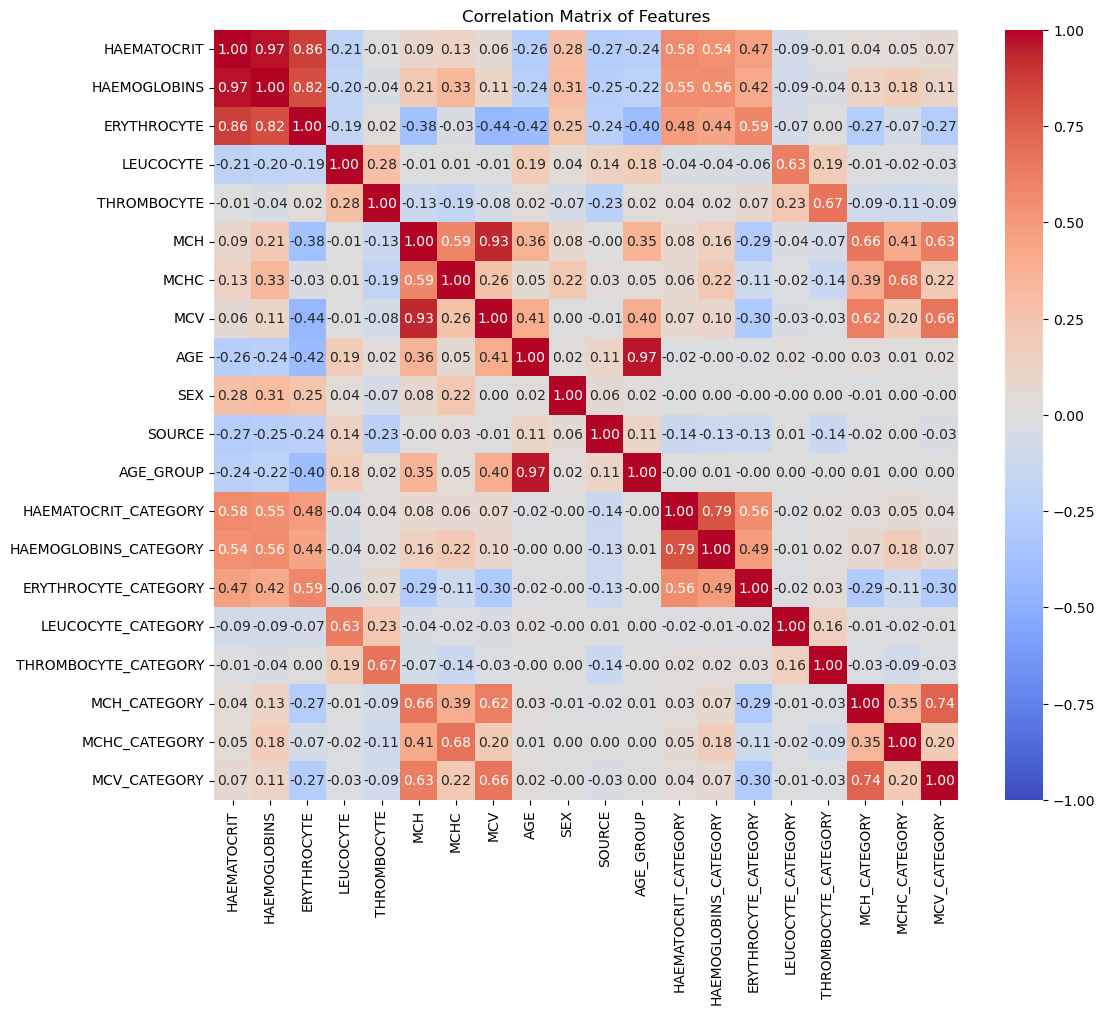

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset with categorized features
file_path = "C:/Users/akp24/docassist-main/data/processed/dataset_with_categorized_features.xlsx"
df = pd.read_excel(file_path)

# Convert SEX and AGE_GROUP to numerical values
df['SEX'] = df['SEX'].map({'M': 1, 'F': 0})

# Map AGE_GROUP to numerical values
age_group_mapping = {
    'Infants and Young Children': 1,
    'Adolescents and Young Adults': 2,
    'Middle-aged Adults': 3,
    'Older Adults': 4,
    'Elderly': 5
}
df['AGE_GROUP'] = df['AGE_GROUP'].map(age_group_mapping)

# Convert categorized features to numerical values
category_mapping = {'Low': 0, 'Normal': 1, 'High': 2}

for column in df.columns:
    if 'CATEGORY' in column:
        df[column] = df[column].map(category_mapping)

# Step 1: Calculate the correlation matrix
correlation_matrix = df.corr()

# Step 2: Save the correlation matrix to a CSV file
correlation_matrix_path = "C:/Users/akp24/docassist-main/data/processed/correlation_matrix.csv"
correlation_matrix.to_csv(correlation_matrix_path, index=True)

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')

# Step 4: Save the heatmap visualization
heatmap_path = "C:/Users/akp24/docassist-main/visuals/correlation_heatmap.png"
plt.savefig(heatmap_path)
plt.show()


In [3]:
import pickle

# Define the percentile thresholds for each parameter, sex, and age group
percentile_thresholds = {
    'M': {
        'Infants and Young Children': {
            'HAEMATOCRIT': (31.7, 43.2),
            'HAEMOGLOBINS': (10.18, 14.72),
            'ERYTHROCYTE': (4.168, 5.624),
            'LEUCOCYTE': (2.9, 17.02),
            'THROMBOCYTE': (86.8, 458.4),
            'MCH': (22.14, 27.9),
            'MCHC': (31.8, 35.46),
            'MCV': (67.42, 82.36)
        },
        'Adolescents and Young Adults': {
            'HAEMATOCRIT': (30.92, 49.49),
            'HAEMOGLOBINS': (10.11, 16.7),
            'ERYTHROCYTE': (4.148, 6.17),
            'LEUCOCYTE': (2.5, 14.3),
            'THROMBOCYTE': (50.0, 382.9),
            'MCH': (23.11, 30.4),
            'MCHC': (31.4, 35.2),
            'MCV': (70.41, 89.8)
        },
        'Middle-aged Adults': {
            'HAEMATOCRIT': (29.8, 48.675),
            'HAEMOGLOBINS': (9.6, 16.4),
            'ERYTHROCYTE': (3.5275, 6.015),
            'LEUCOCYTE': (3.925, 18.55),
            'THROMBOCYTE': (79.0, 479.75),
            'MCH': (22.5, 31.3),
            'MCHC': (31.4, 35.2),
            'MCV': (70.925, 92.175)
        },
        'Older Adults': {
            'HAEMATOCRIT': (26.79, 46.1),
            'HAEMOGLOBINS': (8.9, 15.7),
            'ERYTHROCYTE': (3.148, 5.491),
            'LEUCOCYTE': (4.59, 20.0),
            'THROMBOCYTE': (112.9, 443.9),
            'MCH': (24.78, 32.1),
            'MCHC': (31.79, 35.5),
            'MCV': (75.96, 95.51)
        },
        'Elderly': {
            'HAEMATOCRIT': (24.225, 44.5),
            'HAEMOGLOBINS': (8.55, 15.125),
            'ERYTHROCYTE': (2.725, 4.98),
            'LEUCOCYTE': (3.9, 18.625),
            'THROMBOCYTE': (72.25, 362.5),
            'MCH': (24.9, 32.9),
            'MCHC': (31.8, 35.7),
            'MCV': (78.075, 99.15)
        }
    },
    'F': {
        'Infants and Young Children': {
            'HAEMATOCRIT': (32.1, 43.54),
            'HAEMOGLOBINS': (10.4, 14.34),
            'ERYTHROCYTE': (4.034, 5.528),
            'LEUCOCYTE': (2.46, 14.88),
            'THROMBOCYTE': (71.0, 407.2),
            'MCH': (22.72, 28.28),
            'MCHC': (30.86, 34.38),
            'MCV': (70.54, 85.22)
        },
        'Adolescents and Young Adults': {
            'HAEMATOCRIT': (30.03, 43.3),
            'HAEMOGLOBINS': (9.7, 14.4),
            'ERYTHROCYTE': (3.591, 5.488),
            'LEUCOCYTE': (3.0, 13.79),
            'THROMBOCYTE': (115.2, 432.9),
            'MCH': (21.5, 31.0),
            'MCHC': (30.71, 34.6),
            'MCV': (69.24, 91.09)
        },
        'Middle-aged Adults': {
            'HAEMATOCRIT': (28.0, 43.6),
            'HAEMOGLOBINS': (8.9, 14.4),
            'ERYTHROCYTE': (3.359, 5.355),
            'LEUCOCYTE': (2.49, 16.5),
            'THROMBOCYTE': (53.0, 430.6),
            'MCH': (21.63, 31.0),
            'MCHC': (30.4, 34.9),
            'MCV': (71.94, 92.41)
        },
        'Older Adults': {
            'HAEMATOCRIT': (25.71, 43.66),
            'HAEMOGLOBINS': (8.57, 14.6),
            'ERYTHROCYTE': (3.001, 5.2),
            'LEUCOCYTE': (3.9, 19.83),
            'THROMBOCYTE': (111.3, 445.5),
            'MCH': (25.01, 31.93),
            'MCHC': (31.27, 35.0),
            'MCV': (74.81, 96.03)
        },
        'Elderly': {
            'HAEMATOCRIT': (26.6, 40.7),
            'HAEMOGLOBINS': (8.7, 13.45),
            'ERYTHROCYTE': (2.875, 4.8225),
            'LEUCOCYTE': (4.075, 16.6),
            'THROMBOCYTE': (76.75, 456.5),
            'MCH': (23.2, 33.2),
            'MCHC': (31.575, 34.4),
            'MCV': (71.7, 99.7)
        }
    }
}

# Save the percentile thresholds to a file
thresholds_path = r'C:\Users\akp24\docassist-main\models\percentile_thresholds.pkl'

with open(thresholds_path, 'wb') as f:
    pickle.dump(percentile_thresholds, f)

print("Percentile thresholds have been saved successfully.")


Percentile thresholds have been saved successfully.
